In [1]:
import pandas as pd
import openpyxl
import datetime
import numpy
import matplotlib.pyplot as plt


In [2]:
data_to_extract = pd.read_excel('Suivi_PRI.xlsx', sheet_name="Donnees_Sorties")

In [3]:
data_to_extract

,Bdsid,Master Id,Client,Site,Famille,Offre Consolidee,Offre,Declinaison Offre,Produit,Techno Acces,...,Abo Keuros Dim,Fas Keuros Dim,PRI_keuros,Date Mef,AnneeSemaine_Mef,Date Affectationcdp,Contrat Cadre,Spécificité,ID_commande_price,Type_Acte_PB
0,9395248,0000000009455171,DIRECTION Sces ADMINISTRATIFS FINANCIERS,CD-CHATEAUDUN,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.3215,0.0,0.3215,2021-03-31,202113,2018-06-15,37358.0,NaN,NaN,NaN
1,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,MA-BORGO,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7365,0.0,0.7365,2021-03-30,202113,2018-06-27,37358.0,NaN,NaN,NaN
2,9427794,0000000009467458,EIFFAGE SYSTEMES D'INFORMATION,EIFFAGE SI/ENROBES DE LA CRAU ISTRES,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.0760,0.0,0.0760,2021-03-10,202110,2018-06-27,39607.0,NaN,NaN,NaN
3,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,TGI-VALENCE,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7920,0.0,0.7920,2021-03-30,202113,2018-07-03,37358.0,NaN,NaN,NaN
4,9937745,0000000009720098,COLRUYT RETAIL France,CODIFRANCE FAULQUEMONT,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.1300,0.0,0.1300,2021-03-08,202110,2019-01-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,12513838,AVSBO0000000005878,ALTIVERALU,ALTIVERALU ST PATERNE RACAN(0000003850240),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès OTT,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37747.0,NaN,2100360232-001,RESIL
6173,12513958,0000000004650011,COM DE COMMUNES DES PORTES DU LUXEMBOURG,C.C.P.L. CARIGNAN(0000002413451),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,36424.0,NaN,2100360478-001,RESIL
6174,12514793,0000000006481117,TRANSPORT 2000,TRANSPORT 2000 GARGES LES GONESSE(0000003125780),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès ADSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37277.0,NaN,2100362126_EXEC-001,COPTL
6175,12514998,0000000010292193,COOP FRUITS LEGUMES PYRENEES ORIENTALES,COOP FRUITS LEGUMES PYRENEES O(0000003698054),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37281.0,NaN,2100362512-001,RESIL


In [4]:
""" Ask the file to use and load """
name_file = "Suivi_PRI.xlsx"#input('Entrez le nom du fichier a analyser : ')+".xlsx"
name_sheet = "Donnees_Sorties" #input("Entrez le nom de la feuille a analyser : ")
name_keyword_for_extract = "9 IP NET"#input("Le nom de la colonne en fonction duquel se fera le doublons :  ")
name_new_file_extract = "New_"+name_file#input("Nom du nouveau fichier créé : ")+"xlsx"
name_col = "Offre"
name_id_to_sort = "Bdsid"
dest_filename = name_file
data_to_extract = pd.read_excel(dest_filename, sheet_name=name_sheet) # read file to give 
new_data = data_to_extract[data_to_extract[name_col]==name_keyword_for_extract].sort_values(by=[name_id_to_sort]) # make 
# extraction from dest_filename for having only data link to nele_keywork_for_extract
if name_sheet == "Donnees_Sorties":
    data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                              "Date Debut Dplt", "Date Cr Lien BDSID","Date Installation Client",
                              "Date Mise En Service", "Date Mef",]] # only column that I want
elif name_sheet == "Donnees_Stock":
    data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                              "Date Debut Dplt", "Date_Cr_Lien_BDSID",'Date Installation Client',
                             "Date Installation Technique","Date Installation Planifiee",
                             "Date Mise En Service"]] # only column that I want
data_to_treat = data[data["Operation"] == "ACTIVATION"].sort_values(by=[name_id_to_sort])
data_to_treat.to_excel(name_new_file_extract, sheet_name=name_sheet, index = False) # create new 
data_to_treat_no_Nan = data_to_treat.dropna()
print(data_to_treat_no_Nan)
print(data_to_treat)
# file contains data in new_data
#print("fini")

         Bdsid         Master Id                                    Client  \
1      9425565  0000000009471782  DIRECTION Sces ADMINISTRATIFS FINANCIERS   
3      9445066  0000000009470962  DIRECTION Sces ADMINISTRATIFS FINANCIERS   
5      9952685  0000000009733622                             THYM BUSINESS   
6      9956994  0000000009734735                             THYM BUSINESS   
7      9958349  0000000009735420                             THYM BUSINESS   
...        ...               ...                                       ...   
1030  12209047   MR0010000131117                                    KEOLIS   
1218  12252964   MR0010000134333                                DPD France   
1332  12292593   MR0010000132849                                      CNAM   
1432  12307484  0000000010891365              DSNA_Télécom Opérationnelles   
1433  12307487  0000000010891630              DSNA_Télécom Opérationnelles   

       Operation     Offre        Cdp Date Debut Dplt Date Cr L

In [5]:
pd.read_excel('New_Suivi_PRI.xlsx')

,Bdsid,Master Id,Client,Operation,Offre,Cdp,Date Debut Dplt,Date Cr Lien BDSID,Date Installation Client,Date Mise En Service,Date Mef
0,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,ACTIVATION,9 IP NET,slaatiris,2018-06-27,2020-09-11,2021-03-25,2021-03-25,2021-03-30
1,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,ACTIVATION,9 IP NET,slaatiris,2018-07-03,2021-01-11,2021-03-25,2021-03-25,2021-03-30
2,9952685,0000000009733622,THYM BUSINESS,ACTIVATION,9 IP NET,TYBx0D32,2019-01-21,2020-06-03,2021-05-05,2021-02-15,2021-03-07
3,9956994,0000000009734735,THYM BUSINESS,ACTIVATION,9 IP NET,TYBx0D32,2019-01-22,2020-09-11,2021-05-12,2021-03-12,2021-03-19
4,9958349,0000000009735420,THYM BUSINESS,ACTIVATION,9 IP NET,TYBx0D32,2019-01-22,2020-12-03,2021-05-19,2021-01-12,2021-03-19
...,...,...,...,...,...,...,...,...,...,...,...
72,12292593,MR0010000132849,CNAM,ACTIVATION,9 IP NET,skonan,2021-02-10,2021-02-16,2021-03-26,2021-03-26,2021-03-29
73,12295656,MR0010000135233,DIRECTION Sces ADMINISTRATIFS FINANCIERS,ACTIVATION,9 IP NET,slaatiris,2021-02-10,NaT,2021-03-08,2021-03-08,2021-03-15
74,12307484,0000000010891365,DSNA_Télécom Opérationnelles,ACTIVATION,9 IP NET,aabes,2021-02-12,2021-02-19,2021-03-18,2021-03-18,2021-03-19
75,12307487,0000000010891630,DSNA_Télécom Opérationnelles,ACTIVATION,9 IP NET,aabes,2021-02-12,2021-02-17,2021-03-18,2021-03-18,2021-03-19


In [6]:
list_of_days_holyday = ["01/01", "13/04", "01/05", "08/05", "21/05", "14/07", "15/08", "01/11", "11/11", "25/12"]
def days_holyday(year):
    list_of_day_holyday = []
    list_of_month_holyday = []
    list_holydays = []
    for date in range(len(list_of_days_holyday)):
        s = list_of_days_holyday[date].split("/")
        list_holydays.append(datetime.datetime(year,
                                              int(s[1].replace('0','')),
                                              int(s[0].replace('0',''))))
        list_holydays[date]= list_holydays[date].date()
    return list(list_holydays)
    

In [7]:
def nb_weekday_between_two_date(d, end, excluded=(6, 7)):
    days = []
    nb_week = 0
    nb_days = 0
    insert = True
    holydays_date = []
    for i in range(d.year,(end.year+1)):
        holydays_date = list(set(holydays_date + days_holyday(i)))
    if d.date() > end.date():
        d , end = end, d
    while d.date() <= end.date():
        insert = True
        #if(pd.isnull(d.date()) == False and pd.isnull(end.date()) == False):
        d += datetime.timedelta(days=1)
        if (d.isoweekday() not in excluded and d.date() not in holydays_date)and d.date() <= end.date():
            days.append(d)
        else:
            insert = False 
        if ((len(days)%5) == 0) and insert == True:
            nb_week += 1
            nb_days +=5   
        #else:
         #   break
                
    if(len(days)%5 != 0):
        nb_days =(len(days)- nb_days)
    else:
        nb_days = 0
    #return str(nb_week)+" weeks and "+str(nb_days)+" days"
    return nb_week, nb_days

print(nb_weekday_between_two_date(datetime.datetime(2020,6,5),datetime.datetime(2020,8,28)))

(11, 4)


In [8]:
def evaluation(data_to_treat_no_Nan,name_sheet, offre):
    list_step_to_nan = ["First Step Nan", "Second Step Nan", "Third Step Nan", "Fourth Step Nan"]
    list_evaluation_to_nan=[]
    moy = 0
    ecart = 0
    dict_to_eval_nan = {"First Step Nan":0, "Second Step Nan":0, "Third Step Nan":0, "Fourth Step Nan":0}
    one_date = "Date_Cr_Lien_BDSID"
    all_offre = list(data_to_treat_no_Nan['Offre'])
    if(name_sheet == "Donnees_Stock"):
        del dict_to_eval_nan["Fourth Step Nan"]
    for offre in range(len(all_offre)):
        if(name_sheet == "Donnees_Stock"):
            if(pd.isnull(list(data_to_treat_no_Nan["Date Installation Technique"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            elif(pd.isnull(list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Technique"])[offre]
            else:
                list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre],
                                   list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
        else:
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre],
                               list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre],
                               list(data_to_treat_no_Nan['Date Mef'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
            dict_to_eval_nan["Fourth Step Nan"] = dict_to_eval_nan["Fourth Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Mise En Service'])[offre], list(data_to_treat_no_Nan['Date Mef'])[offre])[0]
            
        dict_to_eval_nan["Third Step Nan"] = dict_to_eval_nan["Third Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre])[0]
    
    for key,value in dict_to_eval_nan.items():
        dict_to_eval_nan[key]=round(value/len(all_offre))
    return dict_to_eval_nan
        
dico_to_eval_nan = evaluation(data_to_treat_no_Nan,"Donnees_Sorties", "9 IP NET")
dico_to_eval_nan
    

{'First Step Nan': 35,
 'Second Step Nan': 22,
 'Third Step Nan': 1,
 'Fourth Step Nan': 2}

In [9]:
def check_nb_week_use_to_nan(step_at_moment):
    return datetime.timedelta(weeks=dico_to_eval_nan[step_at_moment+" Nan"])


In [10]:
def calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do):
    total_week, total_day = 0, 0
    cpt_day = 0
    for key, value in dict_time_do.items():
        week = 0
        #split_value = #value.split(" weeks and ")
        week = value #int(split_value[0])
        day = l_day[cpt_day] #int(split_value[1].replace(" days",""))
        total_week = total_week + week
        if total_day >= 5:
            total_week += 1
            total_day = total_day - 5
        else:
            total_day = total_day + day
        cpt_day +=1
    '''if total_day == 0:
        return "le cdp "+ str(cdp) + " has done "+str(total_week)+ "weeks"
    else:
        return "le cdp "+ str(cdp) + " has done "+str(total_week)+" weeks and "+str(total_day)+" days"'''
    return total_week    
print(calcul_total_week_do_by_cdp("ezz",[2,1,0,0],{'First Step': 141,'Second Step': 0, 'Third Step': 0,
                                                   'Fourth Step': 0}))
        
    

141


In [11]:
def create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check, name_sheet):
    list_step = ["First Step", "Second Step", "Third Step", "Fourth Step", "Total week"]
    dict_cdp_time_do = {}
    dict_step_to_do_cdp = {}
    l_day = []
    if(name_sheet == "Donnees_Stock"):
        del list_step[3]       
    for i in range(len(list_step)-1):
        week_to_add = 0
        if(pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == False):
            week_to_add = check_nb_week_use_to_nan(list_step[i])
            list_date_to_check[i] = list_date_to_check[i+1]-week_to_add
        elif(pd.isnull(list_date_to_check[i]) == False and pd.isnull(list_date_to_check[i+1]) == True):
            week_to_add = check_nb_week_use_to_nan(list_step[i])
            list_date_to_check[i+1] = list_date_to_check[i]+week_to_add
        elif pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == True:
            indexNames = data_to_treat[idProject].index
            data_to_treat.drop(indexNames , inplace=True)
            continue
            #list_date_to_check[i+1] = list_date_to_check[i] = datetime.datetime(datetime.datetime.now().year,
             #                                                                   datetime.datetime.now().month,
              #                                                                  datetime.datetime.now().day)
        date1 = str(list_date_to_check[i]).split(' ')[0].split("-")
        date2 = str(list_date_to_check[i+1]).split(' ')[0].split("-")

        end = datetime.datetime(int(date2[0]),int(date2[1]),int(date2[2]))
        deb = datetime.datetime(int(date1[0]),int(date1[1]),int(date1[2]))


        dict_step_to_do_cdp[list_step[i]], day = nb_weekday_between_two_date(deb, end)
        l_day.append(day)
    dict_step_to_do_cdp[list_step[len(list_step)-1]] = calcul_total_week_do_by_cdp(name_cdp, l_day, dict_step_to_do_cdp)
    dict_cdp_time_do[name_cdp] = dict_step_to_do_cdp
    dict_cdp_time_do['Project'] = name_project
    dict_cdp_time_do['IdProject'] = idProject
    #print(dict_cdp_time_do)
    return dict_cdp_time_do


In [12]:
# len(all_cdp)
all_cdp = list(data_to_treat['Cdp'])
all_project = list(data_to_treat['Client'])
all_Idproject = list(data_to_treat['Bdsid'])
list_action_cdp = []
dict_all_cdp_time_do={}
for cdp in range(len(all_cdp)):
    if(name_sheet == "Donnees_Stock"):
        list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date_Cr_Lien_BDSID'])[cdp],
                               list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp]]
    else:
        list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date Cr Lien BDSID'])[cdp],
                           list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp],
                           list(data_to_treat['Date Mef'])[cdp]]
    #print(cdp, list_of_all_date)
    """list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Debut Dplt'])[cdp], 
                                                        list(data_to_treat['Date Cr Lien BDSID'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Cr Lien BDSID'])[cdp], 
                                                         list(data_to_treat['Date Installation Client'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Installation Client'])[cdp], 
                                                         list(data_to_treat['Date Mise En Service'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Mise En Service'])[cdp], 
                                                        list(data_to_treat['Date Mef'])[cdp]))"""
    #print(all_cdp[cdp])
    if(type(all_cdp[cdp]) != str):
        all_cdp[cdp] = "Sans nom"
    list_action_cdp.append(create_dict_cdp_time_do(all_cdp[cdp], all_project[cdp], all_Idproject[cdp], list_of_all_date, "Donnees_Stock"))

list_cdp_without_duplication = list(set(all_cdp))

list_action_every_cdp = []
for cdp in list_cdp_without_duplication :
    for act_cdp in list_action_cdp:
        if cdp == list(act_cdp.keys())[0]:
            list_action_every_cdp.append(act_cdp)
            dict_all_cdp_time_do[cdp] = list_action_every_cdp
    list_action_every_cdp=[]
print(dict_all_cdp_time_do)

{'fjubet': [{'fjubet': {'First Step': 21, 'Second Step': 70, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10356659}, {'fjubet': {'First Step': 51, 'Second Step': 38, 'Third Step': 0, 'Total week': 90}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10357606}, {'fjubet': {'First Step': 76, 'Second Step': 15, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10357630}, {'fjubet': {'First Step': 37, 'Second Step': 54, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10360311}, {'fjubet': {'First Step': 74, 'Second Step': 16, 'Third Step': 0, 'Total week': 90}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10363279}, {'fjubet': {'First Step': 71, 'Second Step': 16, 'Third Step': 0, 'Total week': 87}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10363987}, {'fjubet': {'First Step': 33, 'Second Step': 54, 'Third St

[]


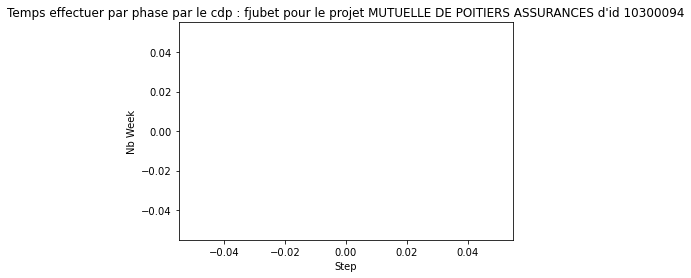

In [13]:
"""def convert_week_in_month(dico_date_in_week):
    for key, value in dico_date_in_week.items():
        if key == "Total week":
            
    pass"""

def create_dataviz_every_cdp_in_function_Oneproject_and_time(dico_date_in_week,name_cdp, name_project, idProject):
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        if search['IdProject'] == idProject:
            xl = list(search[name_cdp].keys())[:len(list_step_to_do)-1]
            yl = list(search[name_cdp].values())[:len(list_step_to_do)-1]
            break
    print(xl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    plt.bar(xl,yl)
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par le cdp : {name_cdp} pour le projet {name_project} d'id {idProject}")
create_dataviz_every_cdp_in_function_Oneproject_and_time(dict_all_cdp_time_do,'fjubet','MUTUELLE DE POITIERS ASSURANCES', 10300094)


['10356659', '10357606', '10357630', '10360311', '10363279', '10363987', '10380502', '10384821', '10385877', '10393767', '10395109', '10412871', '10414976', '10415200', '10418604', '10421869', '10423681', '10423820', '11370961']
[92, 90, 92, 92, 90, 87, 88, 89, 90, 90, 88, 89, 86, 87, 89, 99, 89, 88, 58]


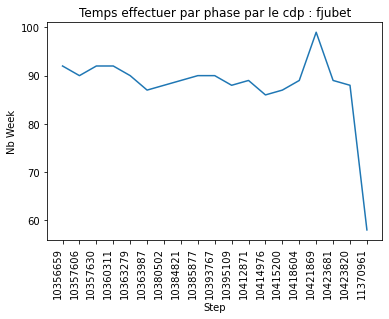

In [14]:
import pylab

import matplotlib.ticker as mticker
def create_dataviz_in_function_project_and_total_time_of_cdp(dico_date_in_week,name_cdp):
    N=10
    list_step_to_do = []
    xl , yl = [], []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        #xl.append('\n'.join([i for i in str(search['IdProject'])]))
        #print(xl)
        xl.append(str(search['IdProject']))
        yl.append(search[name_cdp]['Total week'])
        
    print(xl)
    print(yl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
   # plt.figure(length = 20)
    #plt.bar(xl,yl)
    fig, ax = plt.subplots()
    ax.plot(xl,yl)
    plt.setp(ax.get_xticklabels(),rotation=90, ha="right")
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par le cdp : {name_cdp}")
create_dataviz_in_function_project_and_total_time_of_cdp(dict_all_cdp_time_do,'fjubet')

In [15]:
def calculate_week_average_every_cdp(dico_date_in_week,name_cdp):
    moy, somme = 0, 0
    list_time_to_do = dico_date_in_week[name_cdp]
    if(type(list_time_to_do[-1]) != int):
        for search in list_time_to_do:
            somme = somme + search[name_cdp]['Total week']
        moy = int(int(somme) / int(len(list_time_to_do)))
        dico_date_in_week[name_cdp].append(moy)
        return moy
    else:
        return list_time_to_do[-1]
for key, value in dict_all_cdp_time_do.items():
    calculate_week_average_every_cdp(dict_all_cdp_time_do,key)
print(dict_all_cdp_time_do['fjubet'])

[{'fjubet': {'First Step': 21, 'Second Step': 70, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10356659}, {'fjubet': {'First Step': 51, 'Second Step': 38, 'Third Step': 0, 'Total week': 90}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10357606}, {'fjubet': {'First Step': 76, 'Second Step': 15, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10357630}, {'fjubet': {'First Step': 37, 'Second Step': 54, 'Third Step': 0, 'Total week': 92}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10360311}, {'fjubet': {'First Step': 74, 'Second Step': 16, 'Third Step': 0, 'Total week': 90}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10363279}, {'fjubet': {'First Step': 71, 'Second Step': 16, 'Third Step': 0, 'Total week': 87}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10363987}, {'fjubet': {'First Step': 33, 'Second Step': 54, 'Third Step': 0, 'To

[88, 17, 28, 15, 35, 68, 8, 80, 8, 14, 58, 6, 128, 17, 6, 52, 56, 52, 28, 51, 44, 44, 60, 44, 56, 39]


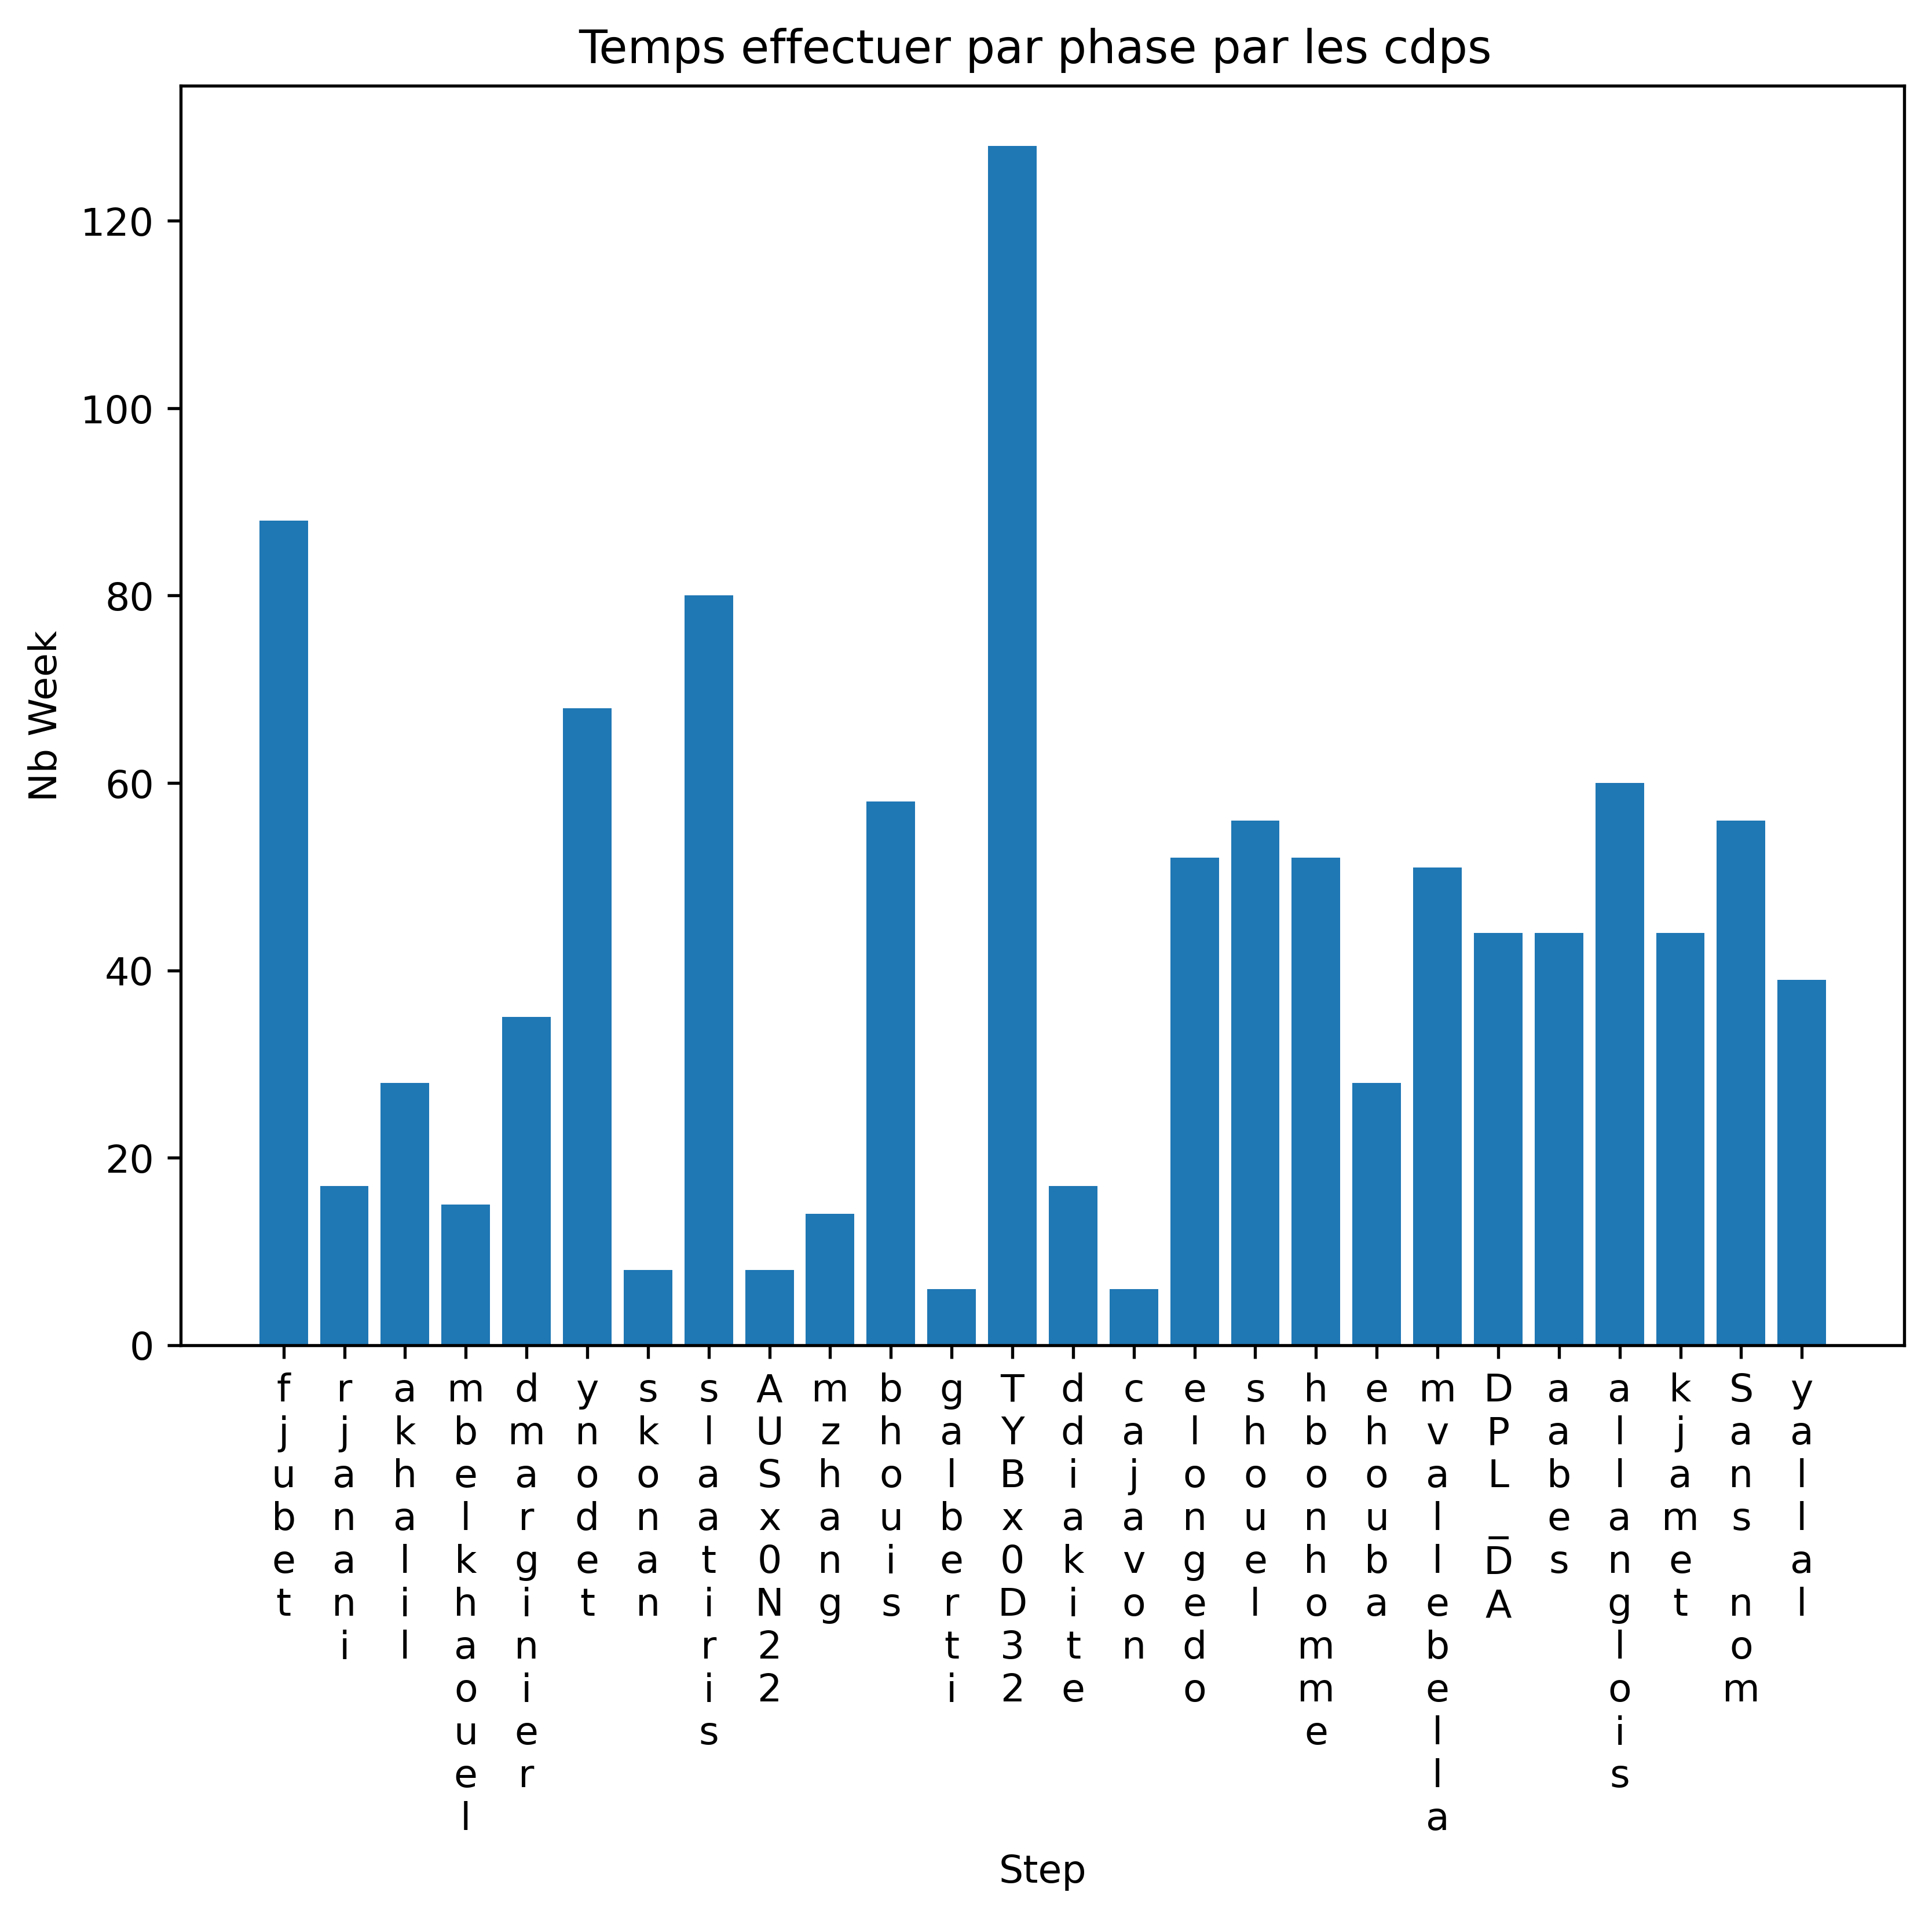

In [16]:

def dataviz_in_function_cdp_and_average_time_to_do(dico_date_in_week,list_cdp):
    list_step_to_do = []
    xl = []
    yl = []
    for cdp in list_cdp:
        s = '\n'.join([i for i in cdp])
        xl.append(s)
    #xl=list_cdp
    for key, value in dico_date_in_week.items():
        yl.append(value[-1])
    print(yl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    plt.figure(figsize=(8, 6), dpi=480)
    plt.bar(xl,yl)
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par les cdps ")
dataviz_in_function_cdp_and_average_time_to_do(dict_all_cdp_time_do,list_cdp_without_duplication)



In [17]:
def check_cdp_out_of_limit_date_of_one_cdp(dict_delay, name_cdp):
    nb_cdp_in_limit = 0
    list_cdp_in_limit = []
    nb_cdp_out_limit = 0
    list_cdp_out_limit = []
    nb_cdp_equal_limit = 0
    list_cdp_equal_limit = []
    for value in range(len(dict_delay)-1):
        if dict_delay[value][name_cdp]['Total week'] < 4:
            nb_cdp_in_limit +=1
            list_cdp_in_limit.append(dict_delay[value]['IdProject'])            
        elif dict_delay[value][name_cdp]['Total week'] > 4:
            nb_cdp_out_limit +=1
            list_cdp_out_limit.append(dict_delay[value]['IdProject'])  
        else:
            nb_cdp_equal_limit +=1
            list_cdp_equal_limit.append(key) 
    percent_in_limit = round((nb_cdp_in_limit*100)/len(dict_delay))
    percent_out_limit = round((nb_cdp_out_limit*100)/len(dict_delay))
    percent_equal_limit = round((nb_cdp_equal_limit*100)/len(dict_delay))
    return [percent_in_limit, percent_equal_limit, percent_out_limit], list_cdp_in_limit, list_cdp_out_limit,list_cdp_equal_limit

a = check_cdp_out_of_limit_date_of_one_cdp([{'fjubet': {'First Step': 27, 'Second Step': 11, 'Third Step': 0, 'Total week': 39}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10534312}, 57], 'fjubet')
print(a)



([0, 0, 50], [], [10534312], [])


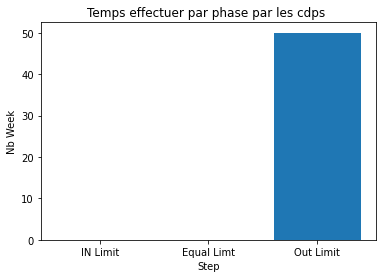

In [18]:
def dataviz_to_check_cdp_out_bounds(list_delay):
    l = ["IN Limit", "Equal Limt", "Out Limit"]
    plt.bar(l,list_delay[0])
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par les cdps ")
dataviz_to_check_cdp_out_bounds(a)

In [19]:
"""s={'a':(2,6),"b":(4,7),"c":(3,9)}
print(s['a'][0])
l = s.values()
print(list(l)[:len(l)-1][0])
print(dict((i,j[0]) for i,j in s.items()))

a = ["tr",3]
a

# Dataviz
import numpy as np
import pandas as pd
res = np.where(pd.isnull(data_to_treat))


s = datetime.datetime(2021,4,3)
print(s.day)
print(datetime.datetime.now().year)

l = data_to_treat["Cdp"]
l = list(set(l))
print(l)
len(l)

import numpy as np    
nat = np.datetime64(2021,4,3)

def nat_check(nat):
    return nat == np.datetime64('NaT')    

nat_check(nat)

nat_as_integer = np.datetime64('NAT').view('i8')
def isnat(your_datetime):
    dtype_string = str(your_datetime.dtype)
    if 'datetime64' in dtype_string or 'timedelta64' in dtype_string:
        return your_datetime.view('i8') == nat_as_integer
    return False  # it can't be a NaT if it's not a dateime

isnat(np.datetime64(datetime.datetime(2021,4,3)))

import datetime


!%hist

!%history

%history

def addOneWeek(date):
    return date +datetime.timedelta(weeks=1)

def subOneWeek(date):
    return date - datetime.timedelta(weeks=1)

print(addOneWeek(datetime.datetime(2014,1,1)))
print(subOneWeek(datetime.datetime(2014,1,1)))
"""
import datetime
aujourdhui = datetime.datetime(2020,6,5)
semaine=datetime.timedelta(weeks=12)
print (aujourdhui + semaine)

2020-08-28 00:00:00


In [20]:
print(data_to_treat)
print("****************************")
indexNames = data_to_treat[data_to_treat['Bdsid'] == 9956994].index
data_to_treat.drop(indexNames, inplace = True)
print(data_to_treat)

         Bdsid         Master Id                                    Client  \
1      9425565  0000000009471782  DIRECTION Sces ADMINISTRATIFS FINANCIERS   
3      9445066  0000000009470962  DIRECTION Sces ADMINISTRATIFS FINANCIERS   
5      9952685  0000000009733622                             THYM BUSINESS   
6      9956994  0000000009734735                             THYM BUSINESS   
7      9958349  0000000009735420                             THYM BUSINESS   
...        ...               ...                                       ...   
1332  12292593   MR0010000132849                                      CNAM   
1366  12295656   MR0010000135233  DIRECTION Sces ADMINISTRATIFS FINANCIERS   
1432  12307484  0000000010891365              DSNA_Télécom Opérationnelles   
1433  12307487  0000000010891630              DSNA_Télécom Opérationnelles   
1508  12327619  0000000010897653                      VEOLIA ENVIRONNEMENT   

       Operation     Offre        Cdp Date Debut Dplt Date Cr L

In [21]:
l = data_to_treat["Cdp"]
l = list(set(l))
print(l)
len(l)

[nan, 'fjubet', 'rjanani', 'akhalil', 'mbelkhaouel', 'dmarginier', 'ynodet', 'skonan', 'slaatiris', 'AUSx0N22', 'mzhang', 'bhouis', 'galberti', 'TYBx0D32', 'ddiakite', 'cajavon', 'elongedo', 'shouel', 'hbonhomme', 'ehouba', 'mvallebella', 'DPL_DA', 'aabes', 'allanglois', 'kjamet', 'yallal']


26